In [28]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import time
import numpy as np

# Import the formations dictionary
from lineupsDict import formations 

### Visualizing Tactical Formations from the Lineups Dictionary

In this step, we iterate through all predefined formations stored in `lineupsDict.py` and display each lineup on a football pitch using the `draw_pitch` function. Each formation is visualized in a separate figure to analyze player positioning and role distribution.

In [3]:
def draw_pitch(ax=None, field_color='green'):
    """
    Draw a 120 x 80 pitch on the given Axes.
    (0,0) is top-left, (120,80) is bottom-right.
    """
    if ax is None:
        ax = plt.subplots(figsize=(12.0, 8.0))
    
    # Set pitch background
    if field_color == 'green':
        ax.set_facecolor('mediumseagreen')
        lc = 'whitesmoke'  # line color
        border_color = 'white'  # Border color to differentiate pitch edges
    else:
        lc = 'black'
        border_color = 'white'
    
    # Outer boundaries with distinct color
    ax.plot([0,0],[0,80], color=border_color, linewidth=3)
    ax.plot([120,120],[0,80], color=border_color, linewidth=3)
    ax.plot([0,120],[0,0], color=border_color, linewidth=3)
    ax.plot([0,120],[80,80], color=border_color, linewidth=3)
    
    # Center line
    ax.plot([60,60],[0,80], color=lc, linewidth=2)
    
    # Center circle
    center_circle = plt.Circle((60, 40), 10, color=lc, fill=False, linewidth=2)
    ax.add_patch(center_circle)
    
    # Penalty areas and arcs (both sides fixed)
    for x in [0, 120]:
        penalty_x = 18 if x == 0 else 120-18
        goal_x = 6 if x == 0 else 120-6
        penalty_spot = 11 if x == 0 else 109
        arc_center = (12, 40) if x == 0 else (108.2, 40)
        arc_angle = 0 if x == 0 else 180
        
        # Penalty area
        ax.plot([x, penalty_x], [18, 18], color=lc, linewidth=2)
        ax.plot([penalty_x, penalty_x], [18, 62], color=lc, linewidth=2)
        ax.plot([x, penalty_x], [62, 62], color=lc, linewidth=2)
        
        # Goal area
        ax.plot([x, goal_x], [30, 30], color=lc, linewidth=2)
        ax.plot([goal_x, goal_x], [30, 50], color=lc, linewidth=2)
        ax.plot([x, goal_x], [50, 50], color=lc, linewidth=2)
        
        # Penalty spots
        ax.plot([penalty_spot], [40], marker='o', markersize=5, color=lc)

        # Center spot
        ax.plot([60], [40], marker='o', markersize=5, color=lc)
        
        # Penalty arcs
        penalty_arc = Arc(
            arc_center, 20, 20, angle=arc_angle, 
            theta1=308, theta2=52, color=lc, linewidth=2
        )
        ax.add_patch(penalty_arc)
        
    # Corners
    corner_radius = 2

    ax.add_patch(plt.Circle((0, 0), corner_radius, color=lc, fill=False, linewidth=2))      # top-left
    ax.add_patch(plt.Circle((120, 0), corner_radius, color=lc, fill=False, linewidth=2))    # top-right
    ax.add_patch(plt.Circle((0, 80), corner_radius, color=lc, fill=False, linewidth=2))     # bottom-left
    ax.add_patch(plt.Circle((120, 80), corner_radius, color=lc, fill=False, linewidth=2))   # bottom-right

    
    # Flip y-axis so top=0
    ax.set_xlim(0,120)
    ax.set_ylim(80,0)
    
    # Remove ticks but maintain pitch edges visibility
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    return ax

In [4]:
# Function to plot the formation
def format_formation(code):
    return "-".join(code)

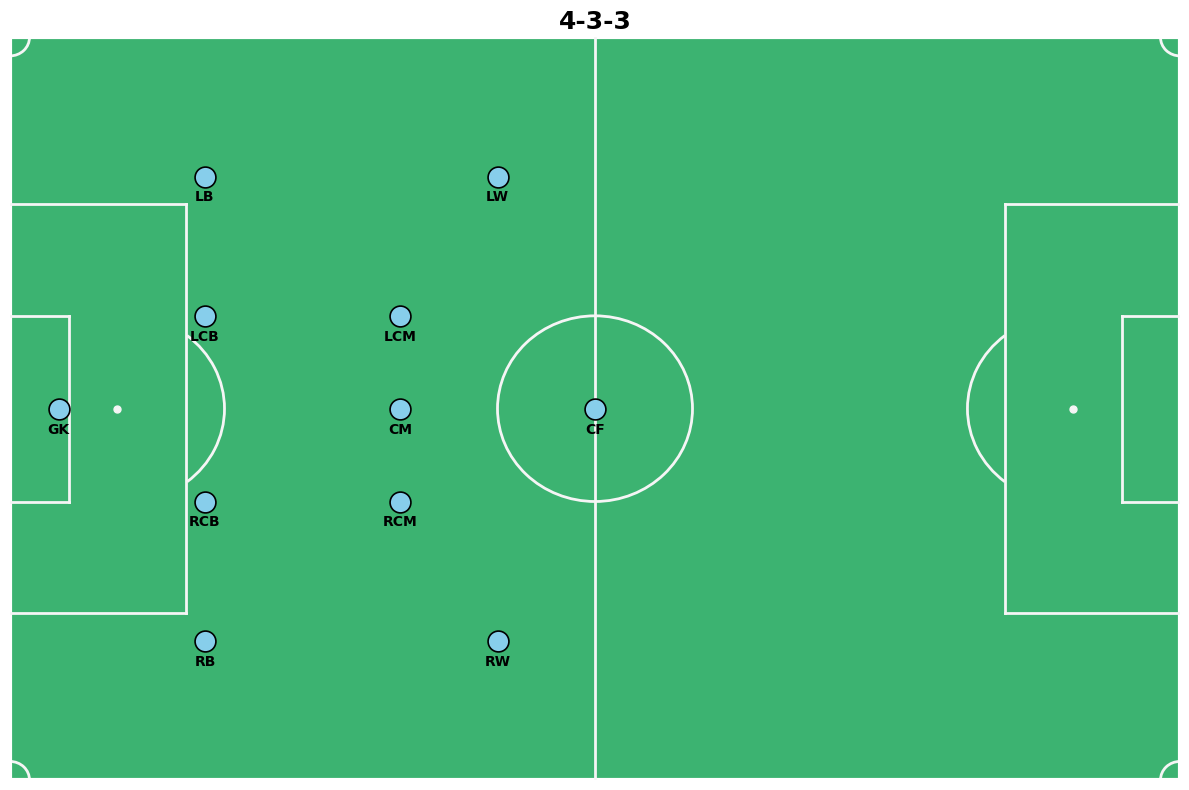

In [55]:
# Select a single formation code
formation_code = "433"  # Change this to any available formation key

# Retrieve the lineup
lineup = formations[formation_code]

# Draw pitch and formation
fig, ax = plt.subplots(figsize=(12, 8))
draw_pitch(ax)

for player in lineup:
    x, y = player["x"], player["y"]
    abbr = player["abbr"]
    ax.scatter(x, y, s=225, color="skyblue", edgecolor="black", linewidth=1.2, zorder=3)
    ax.text(x, y + 3, abbr, fontsize=10, ha="center", va="bottom", color="black", fontweight="bold")

plt.title(f"{format_formation(formation_code)}", fontsize=18, fontweight="bold")
plt.tight_layout()
plt.show()

This cell below print all the formations in the dictionary to show the position of the players

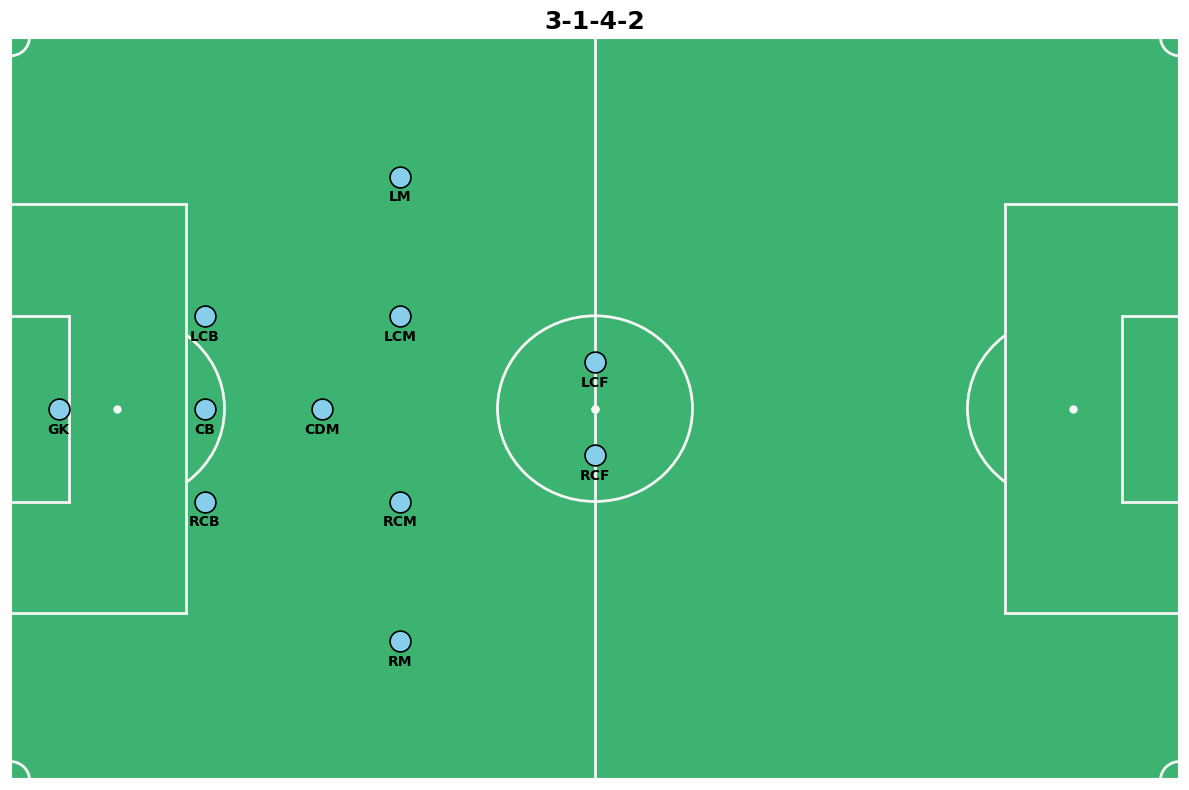

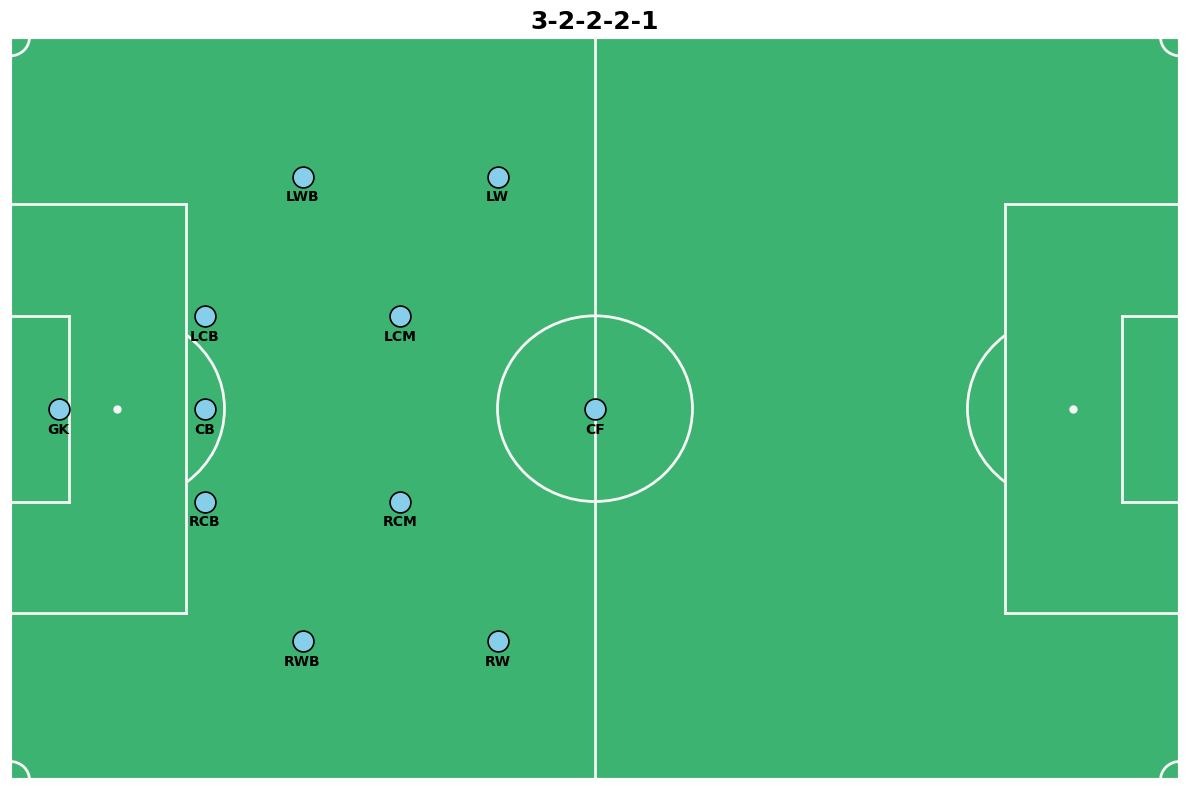

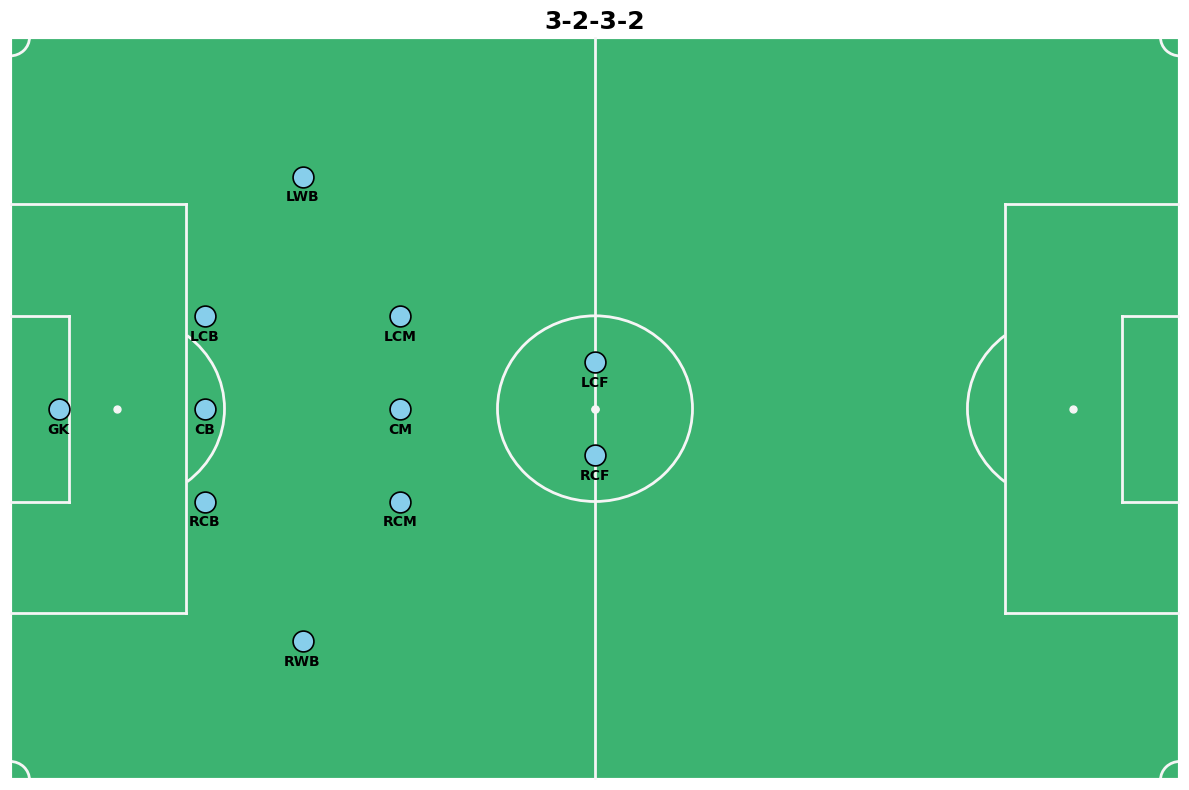

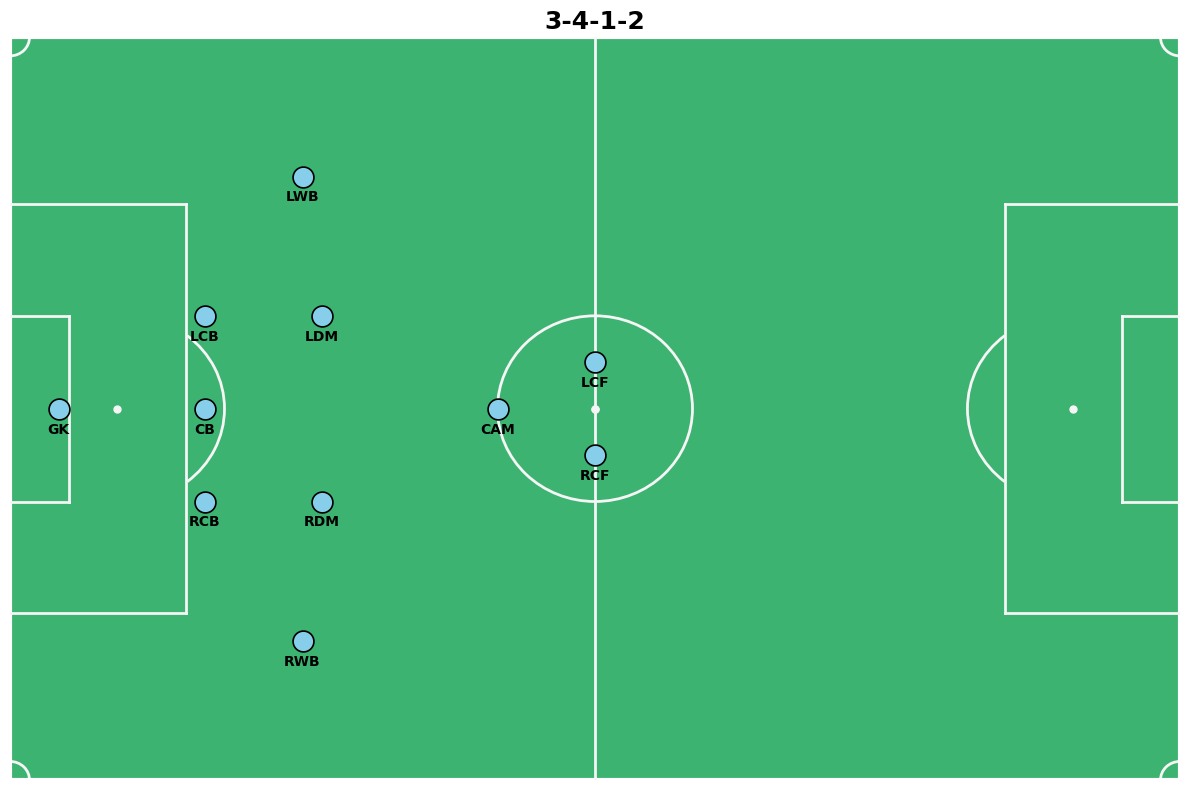

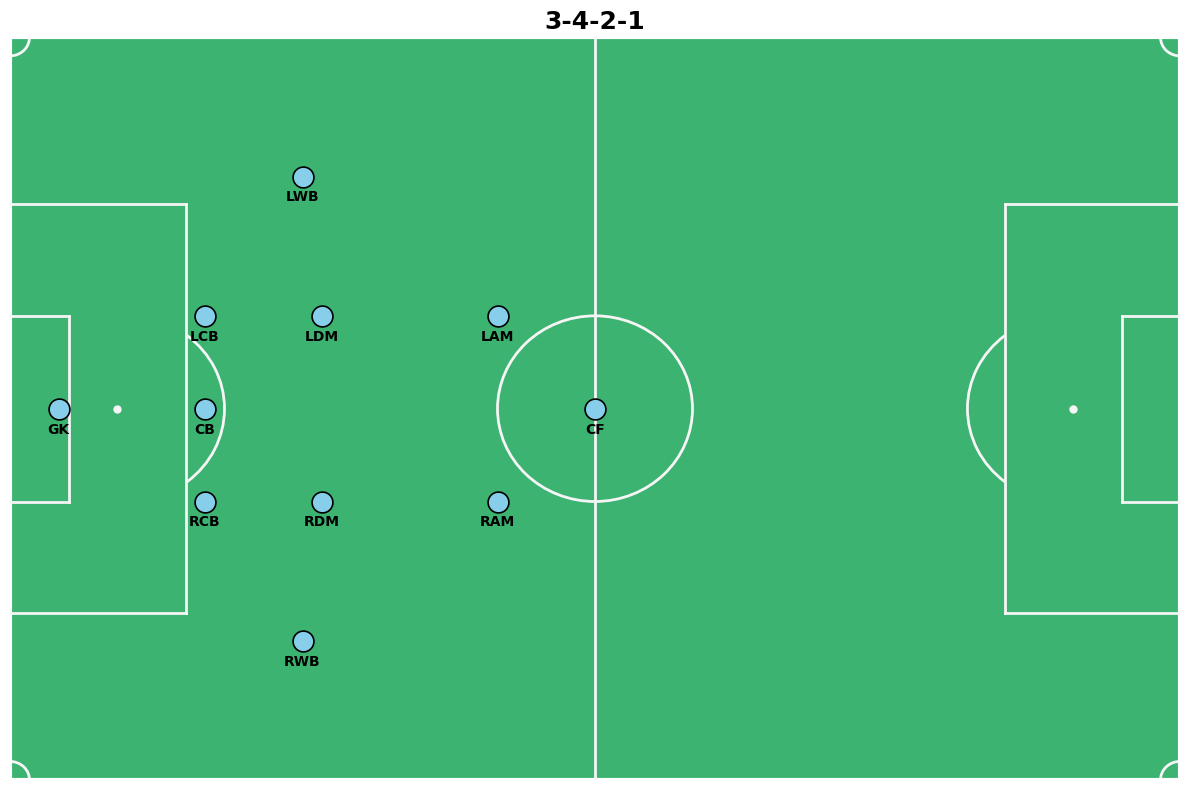

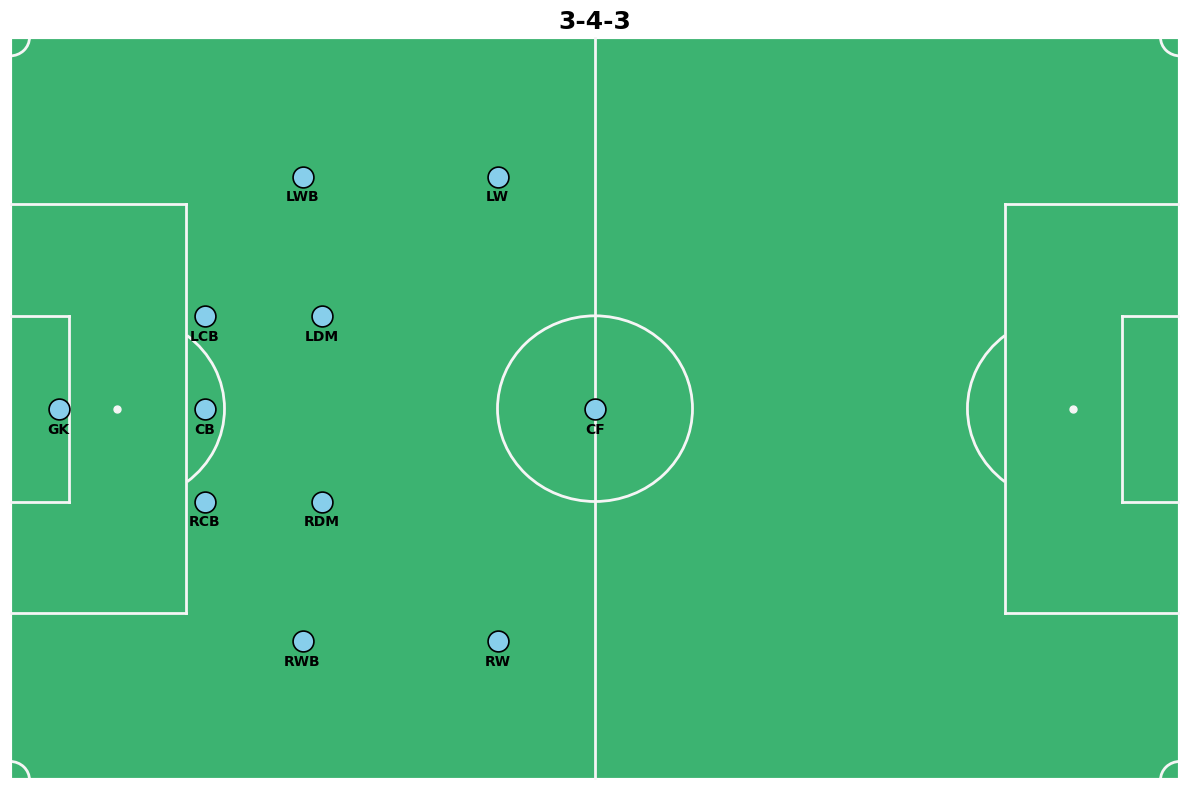

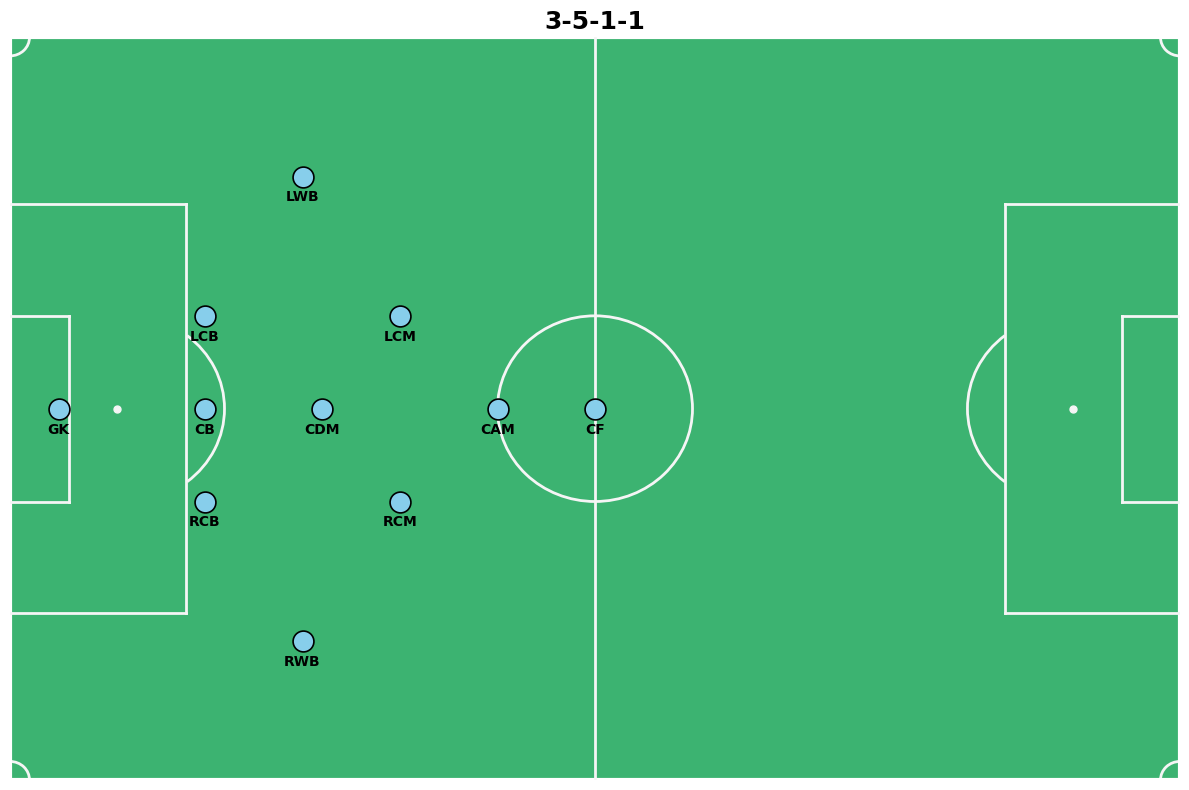

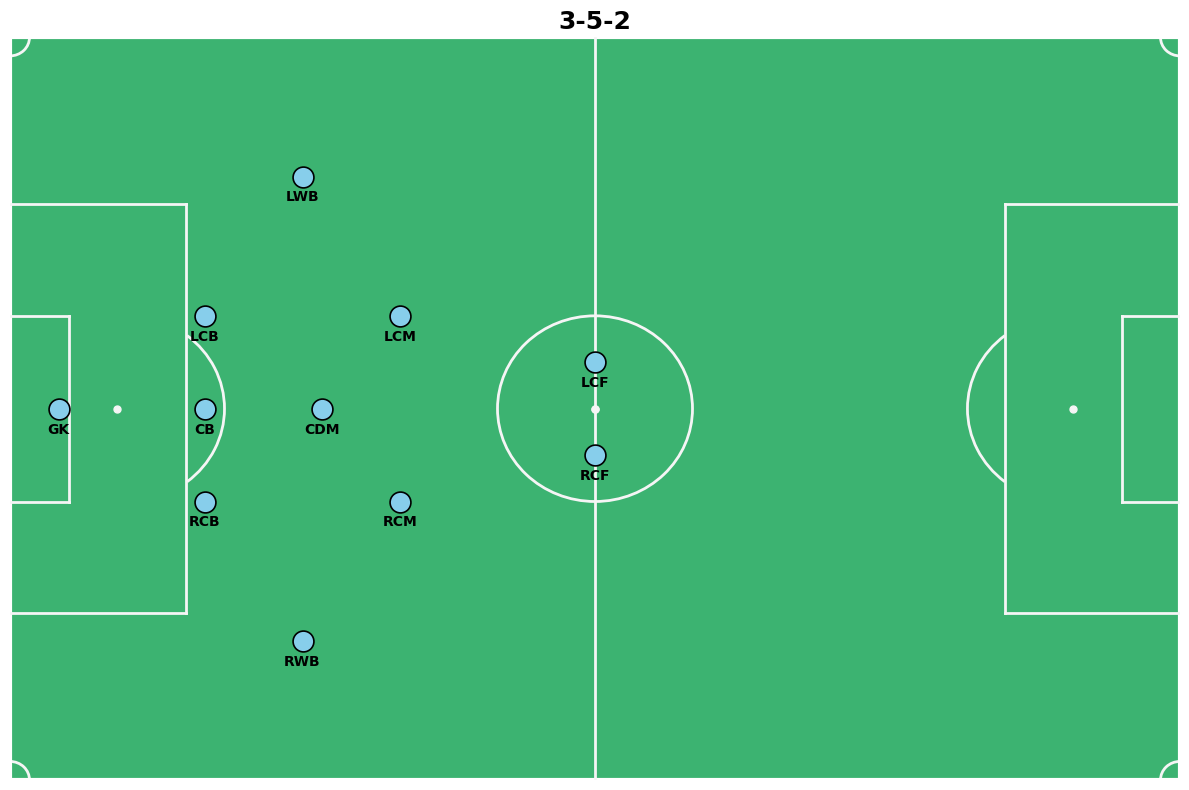

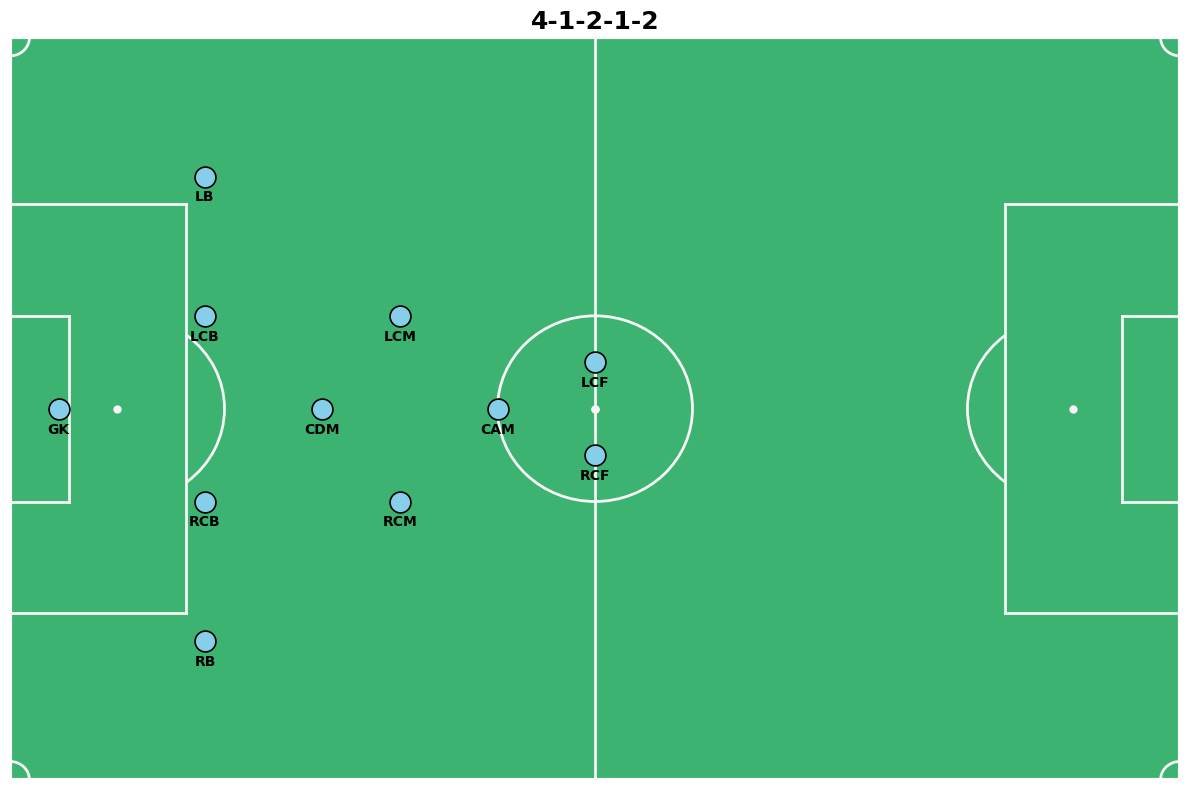

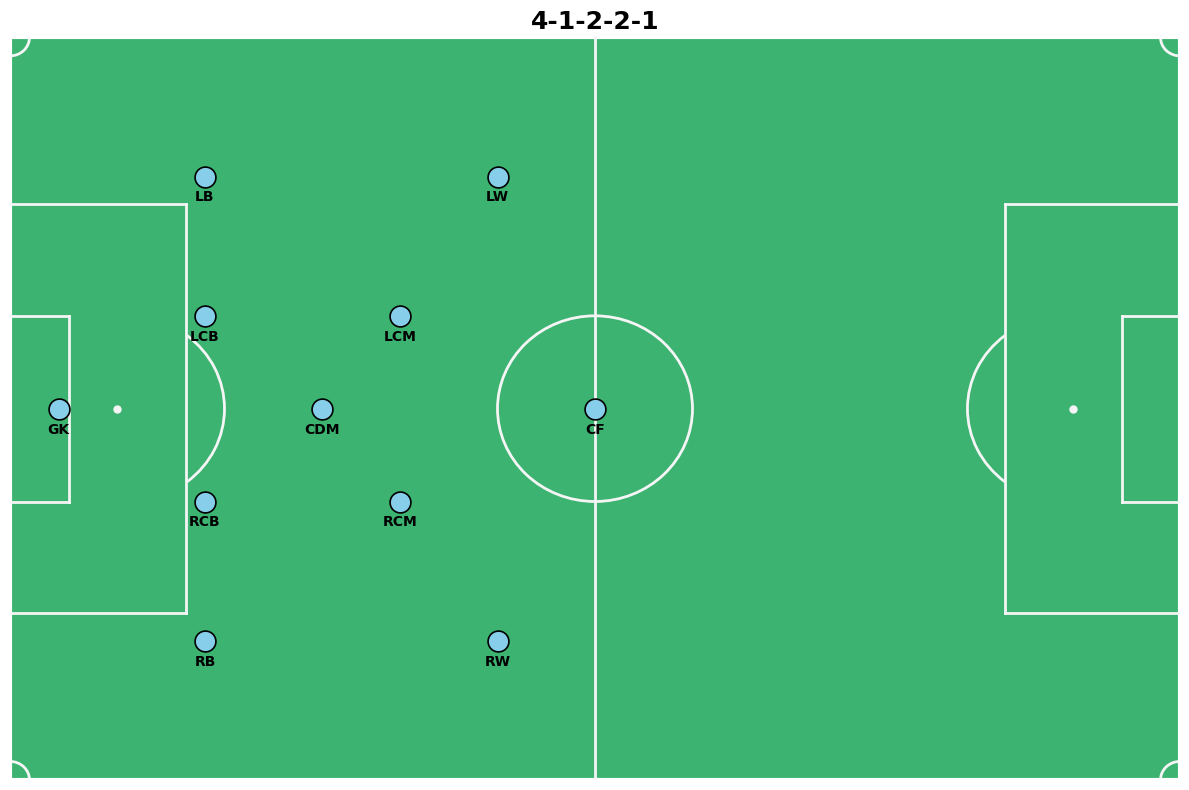

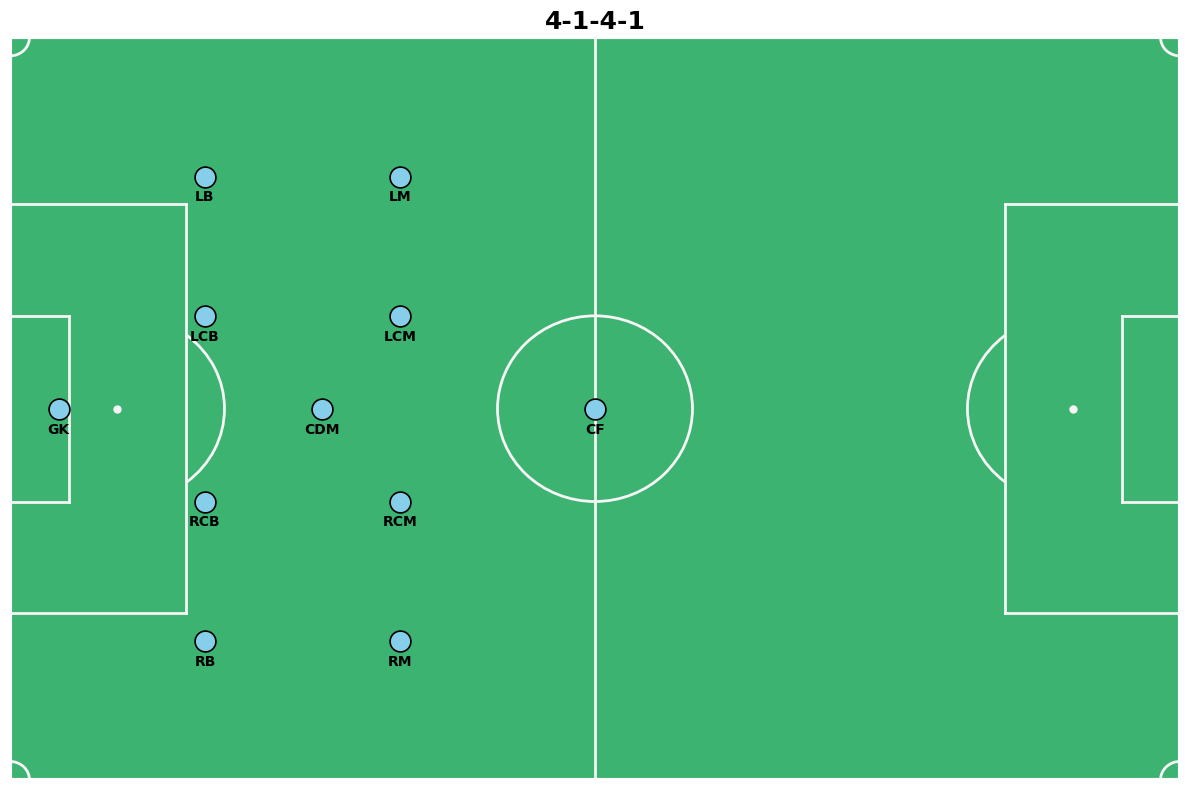

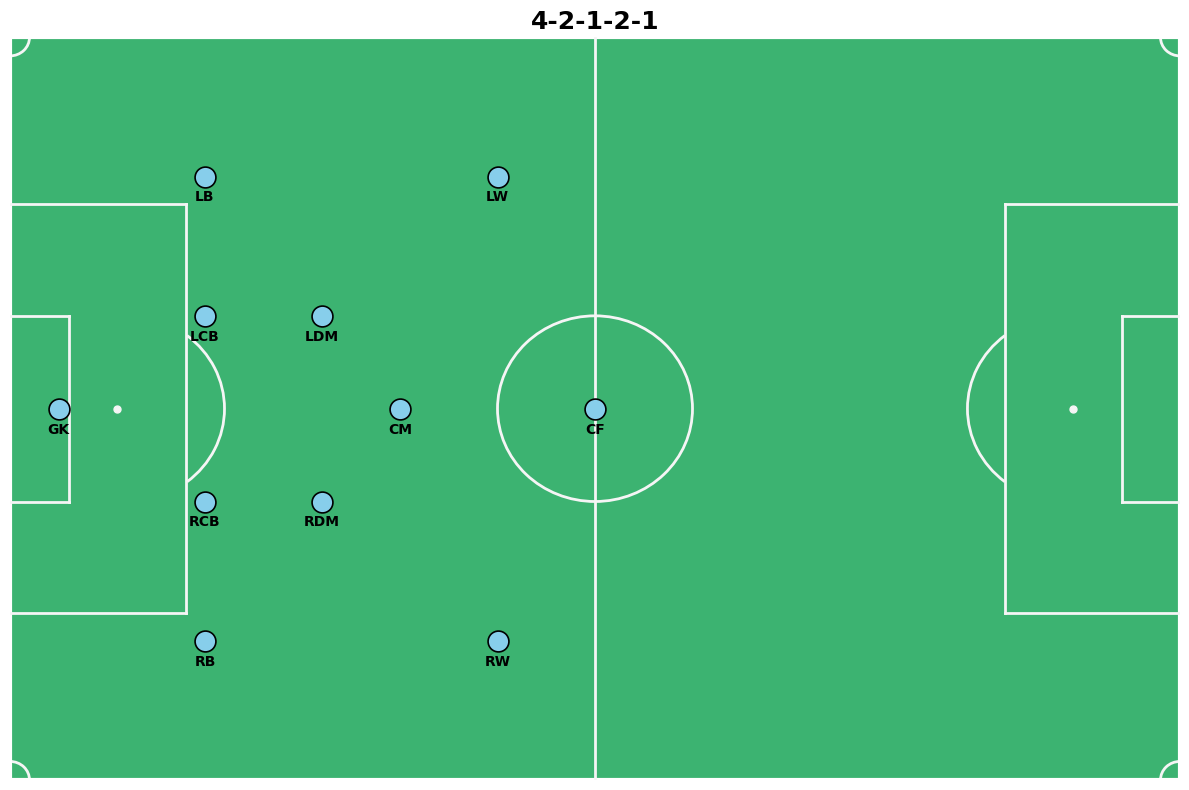

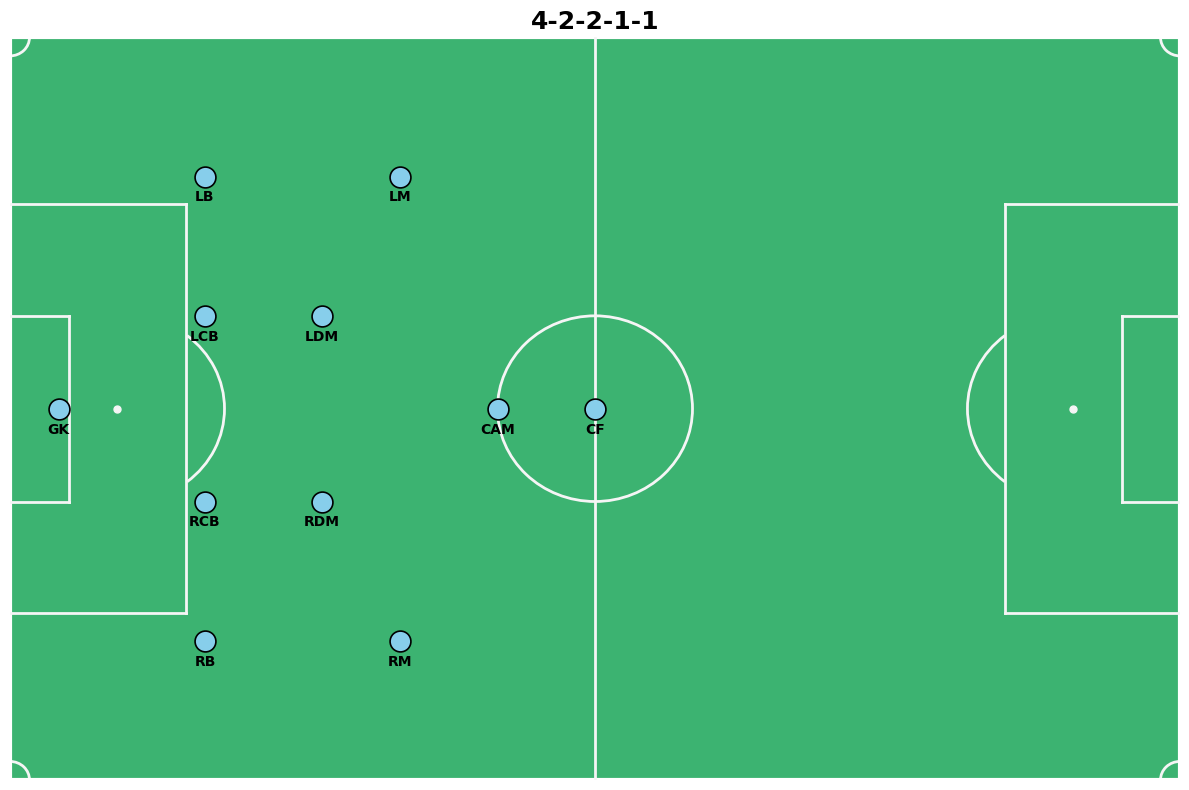

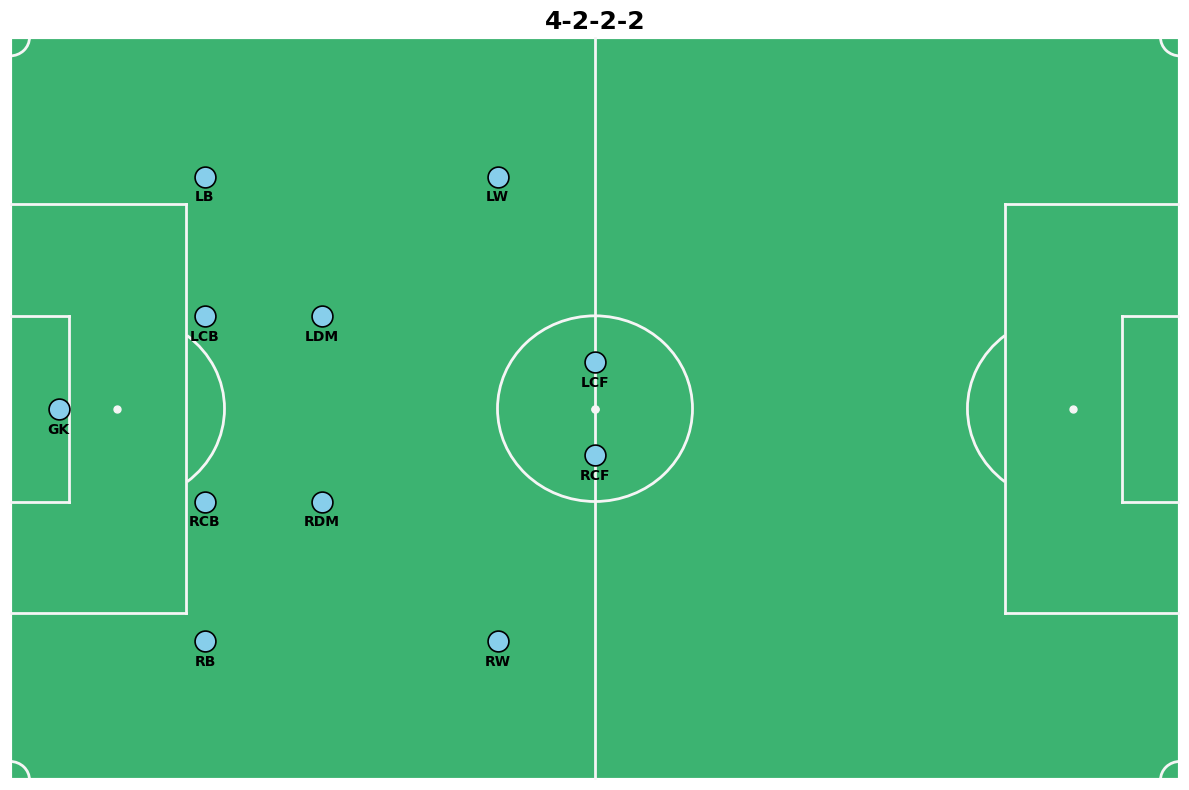

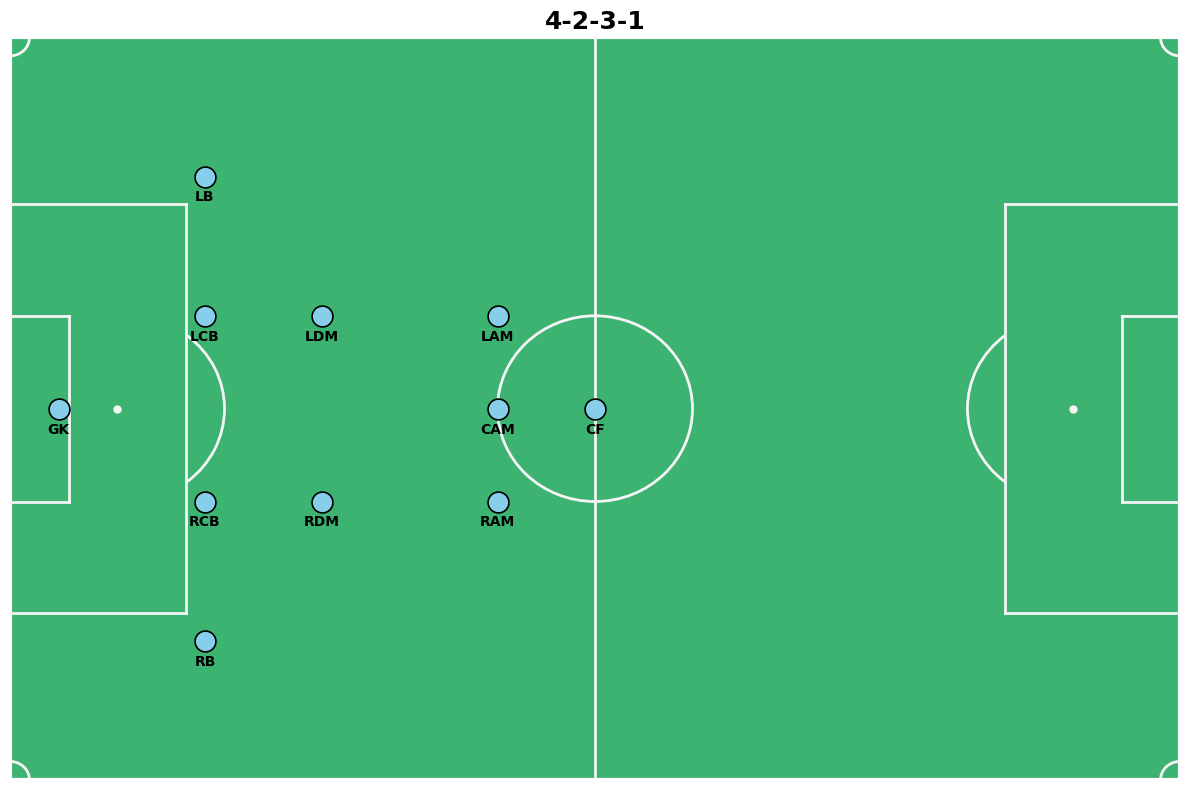

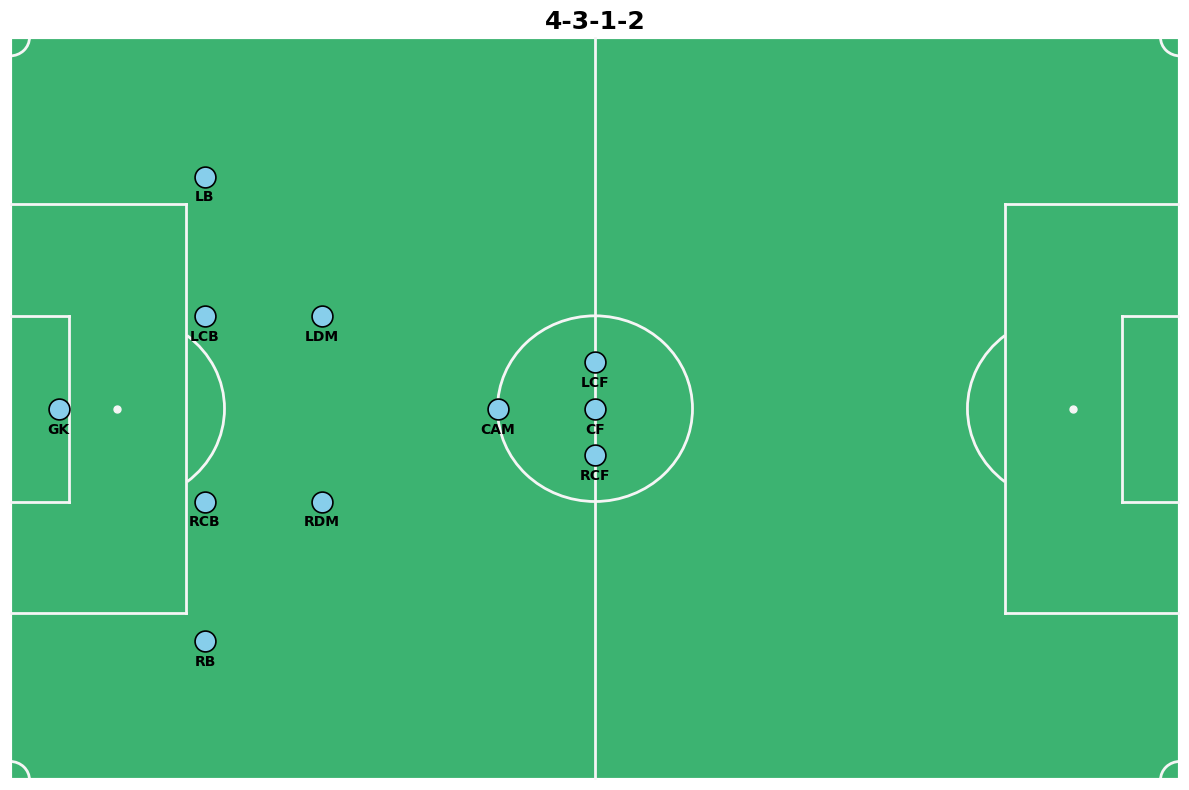

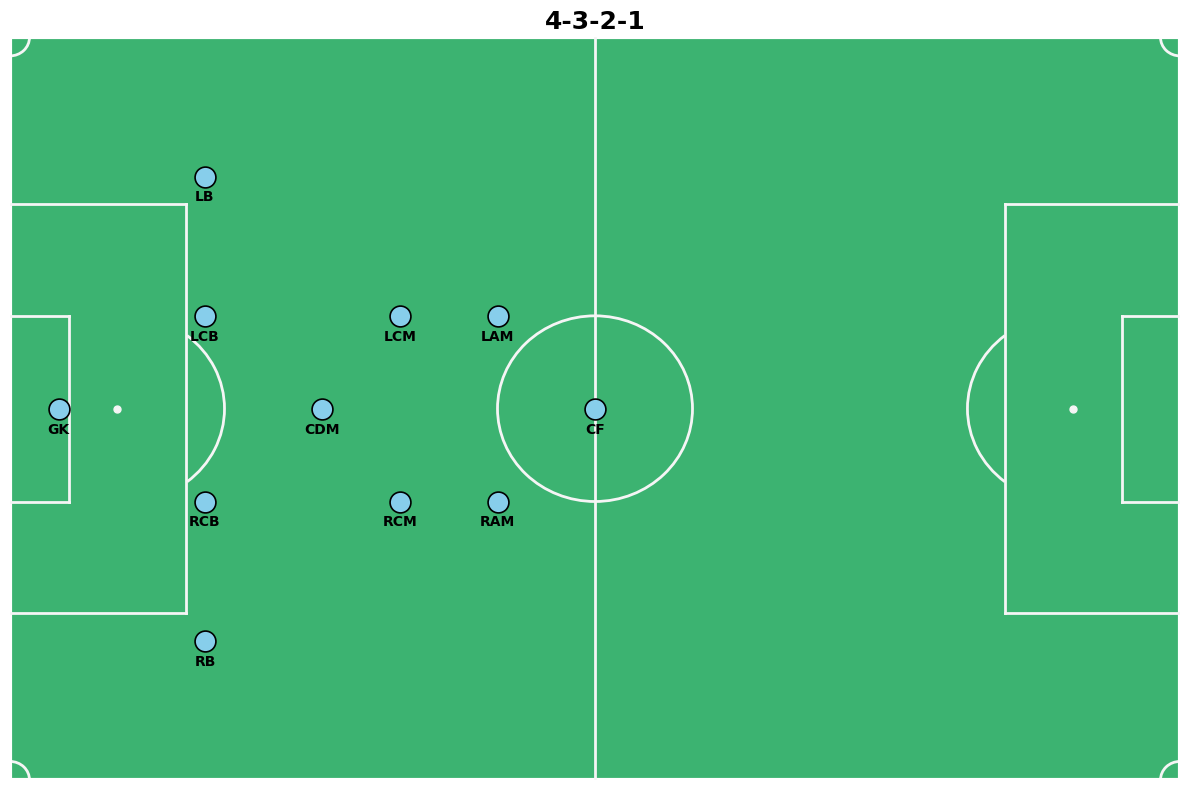

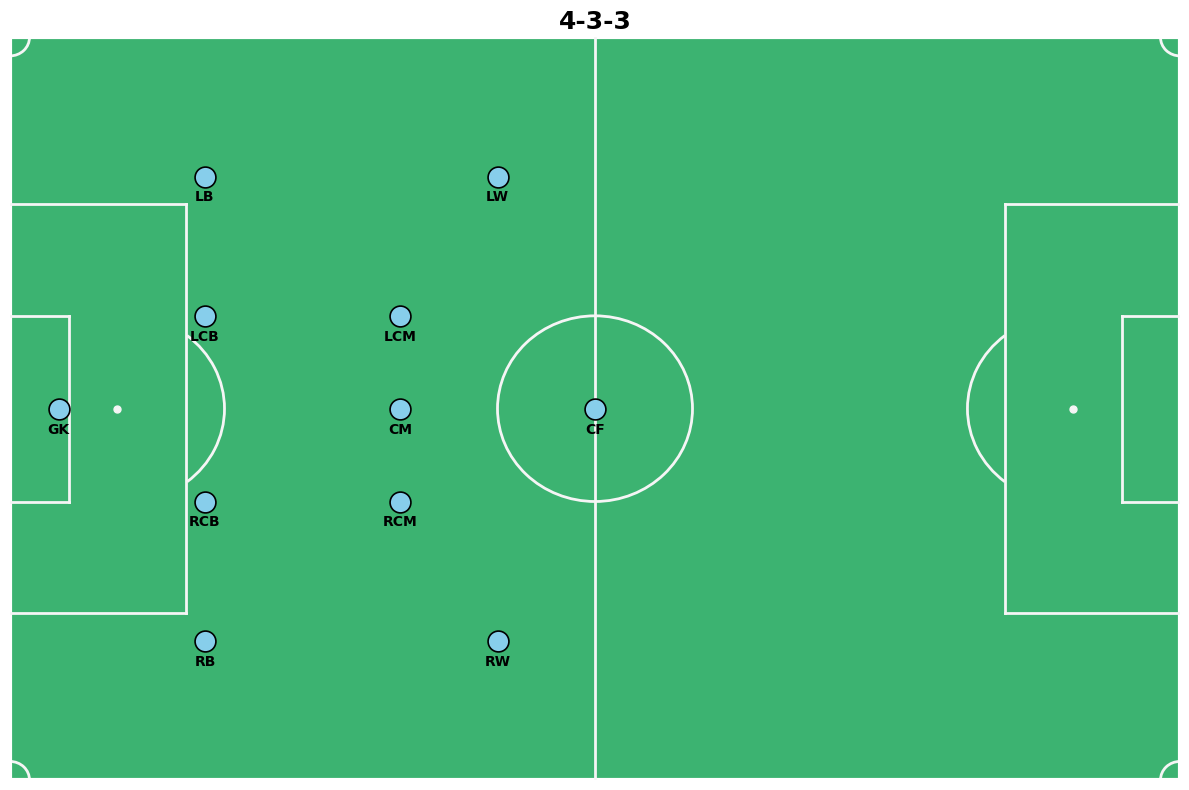

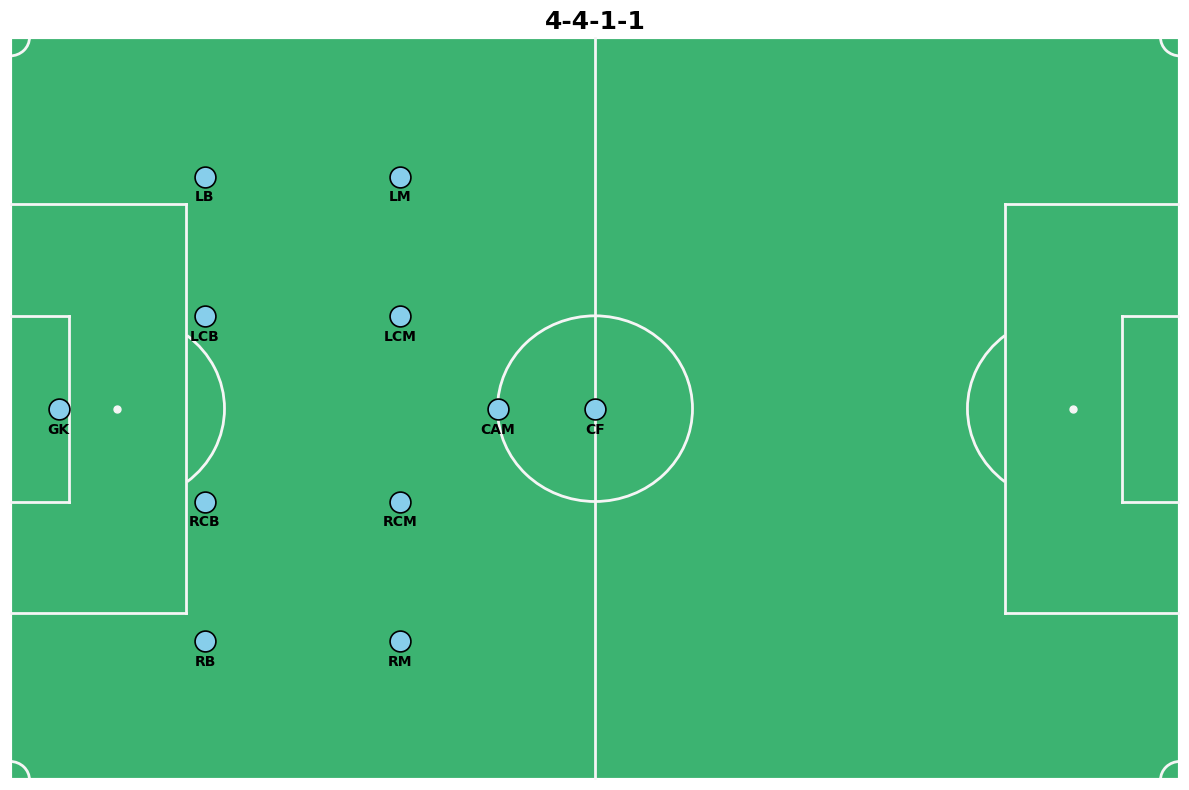

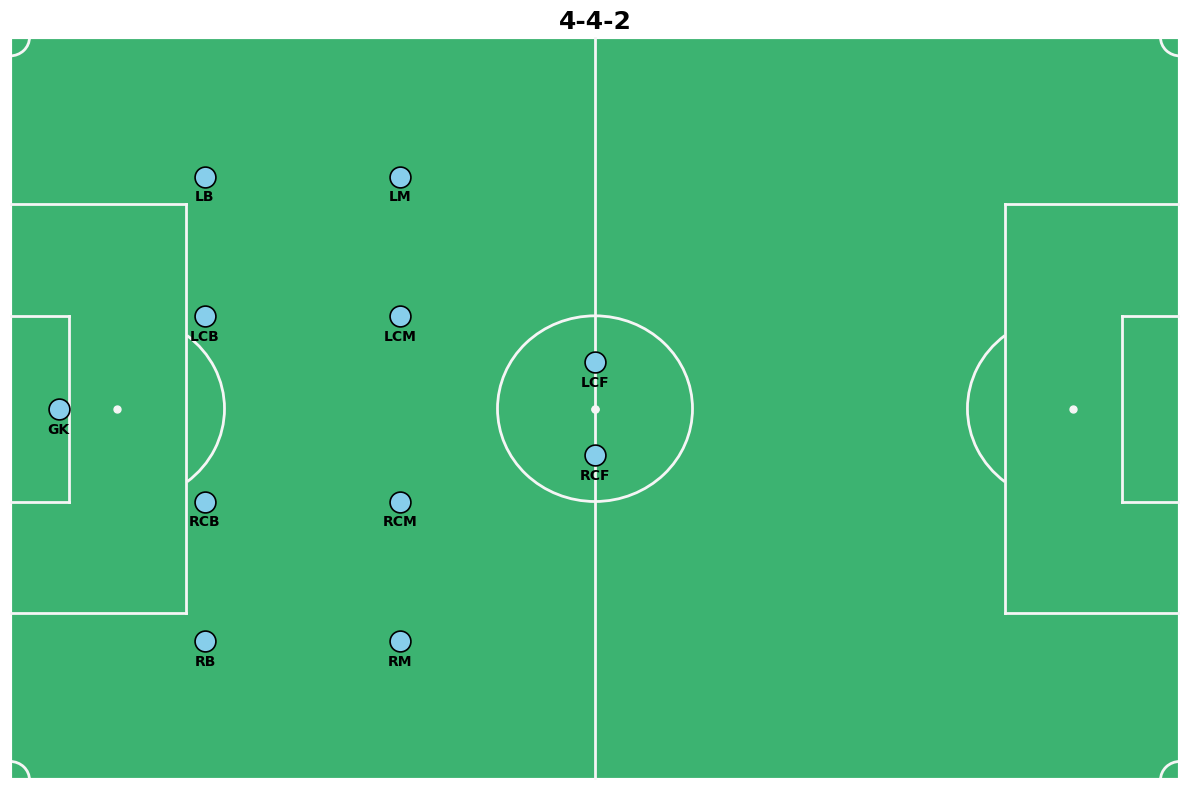

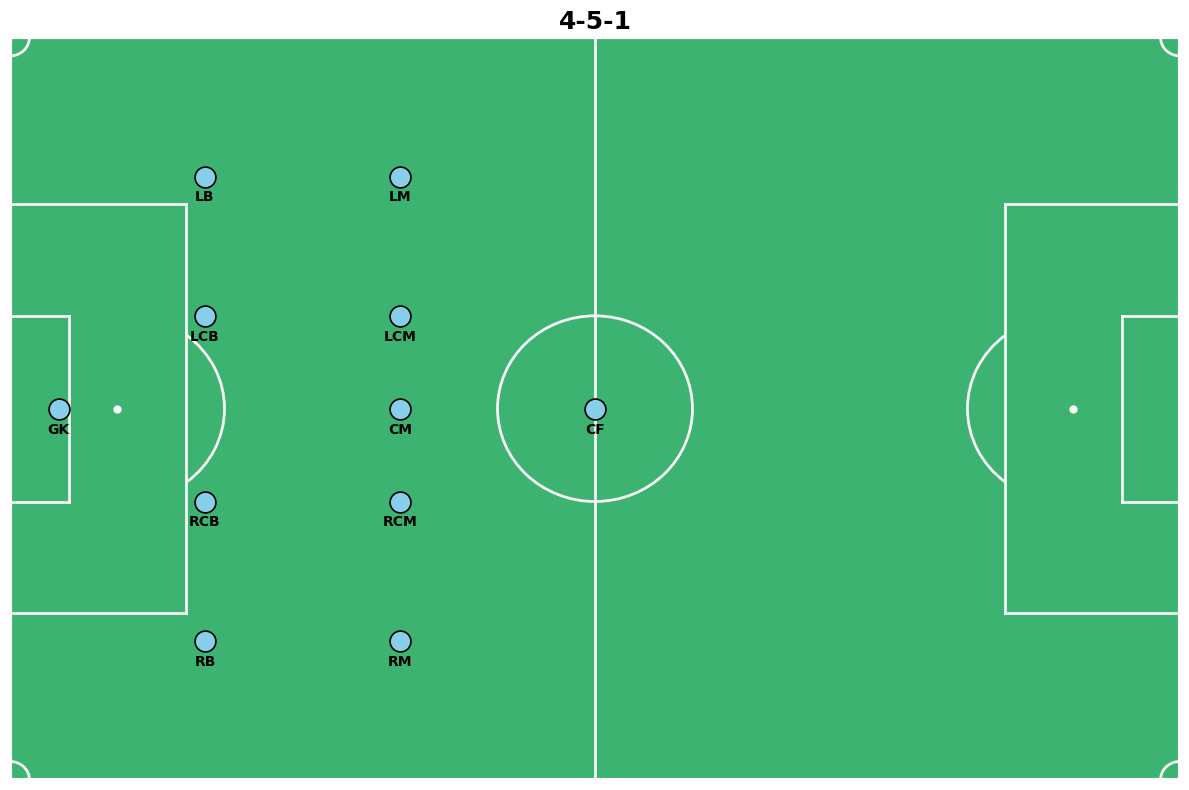

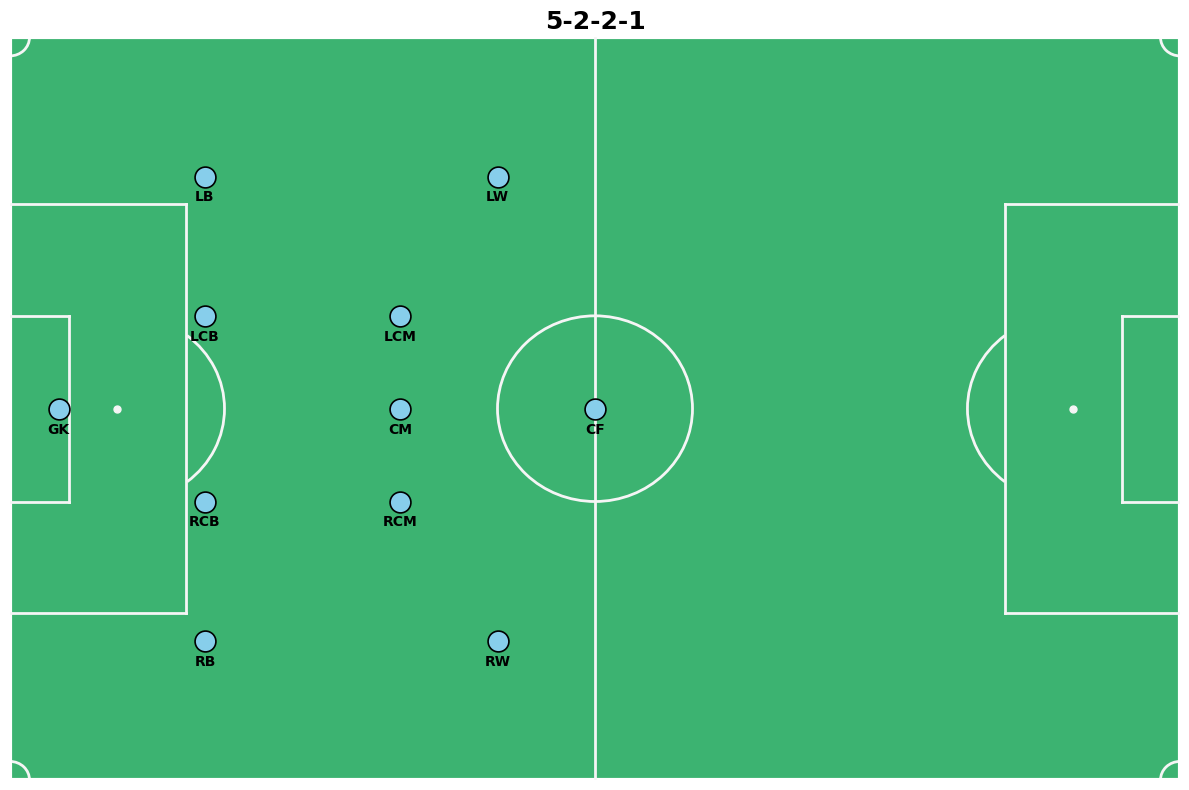

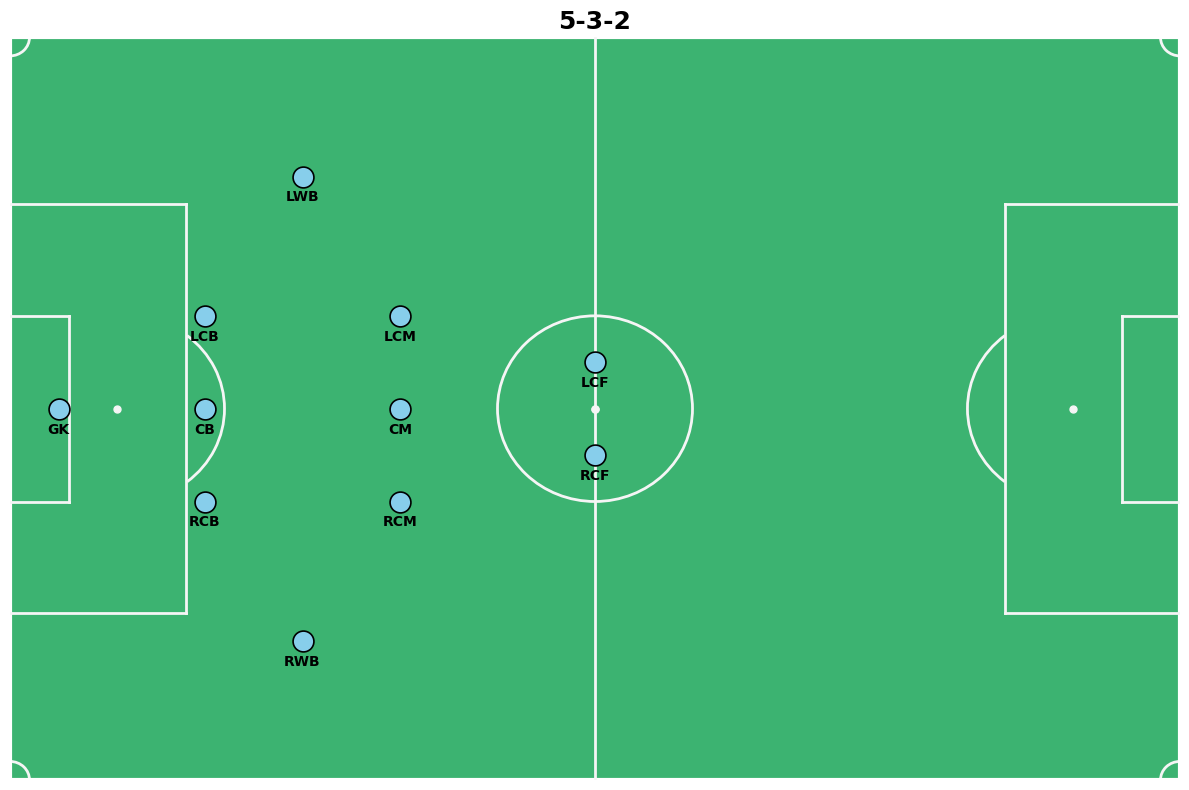

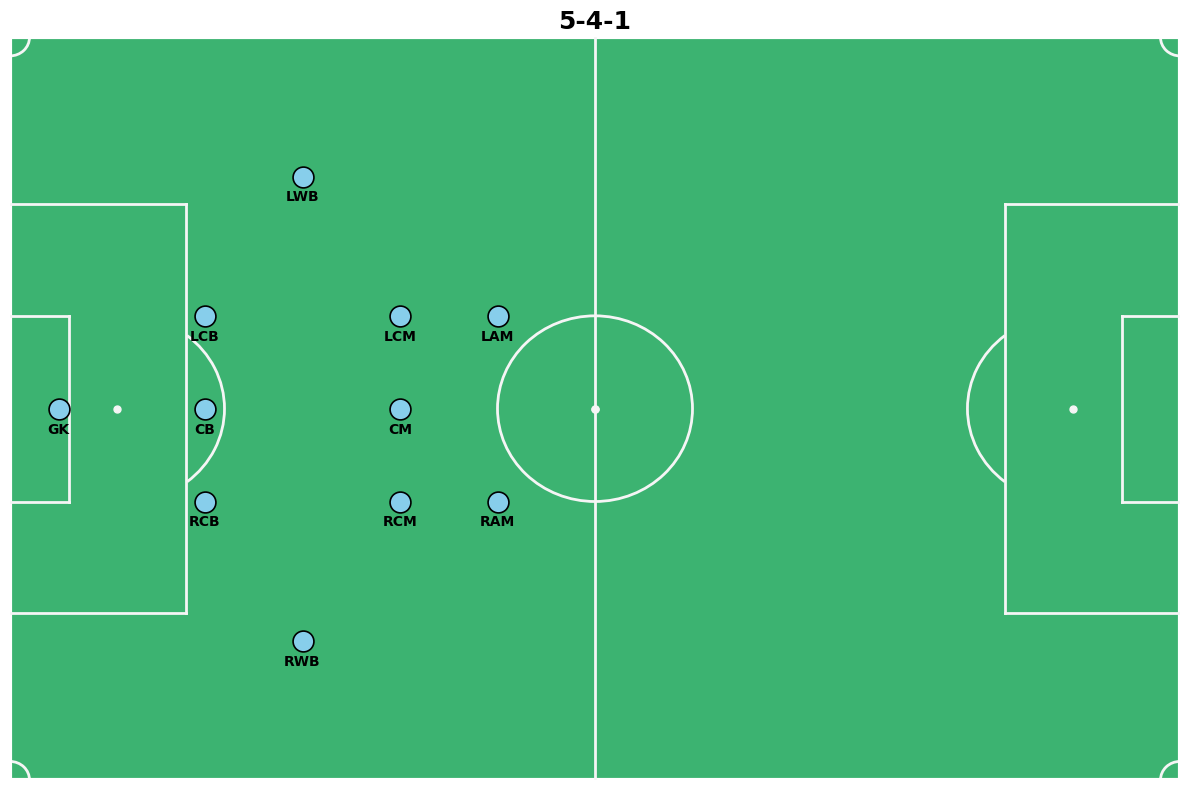

In [56]:
# Loop through all formations in the dictionary
for formation_code, lineup in formations.items():
    fig, ax = plt.subplots(figsize=(12, 8))
    draw_pitch(ax)

    # Plot each player
    for player in lineup:
        x, y = player["x"], player["y"]
        abbr = player["abbr"]
        ax.scatter(x, y, s=225, color="skyblue", edgecolor="black", linewidth=1.2, zorder=3)
        ax.text(x, y + 3, abbr, fontsize=10, ha="center", va="bottom", color="black", fontweight="bold")

    plt.title(f"{format_formation(formation_code)}", fontsize=18, fontweight="bold")
    plt.tight_layout()
    plt.show()
    
    time.sleep(1)

### Home vs Away

In the cell below displays two football teams lined up on the pitch using different formations. The home team (in light blue) is positioned on the left half and follows a 4-3-3 formation, while the away team (in light red) is mirrored on the right half and follows a 3-1-4-2 formation.

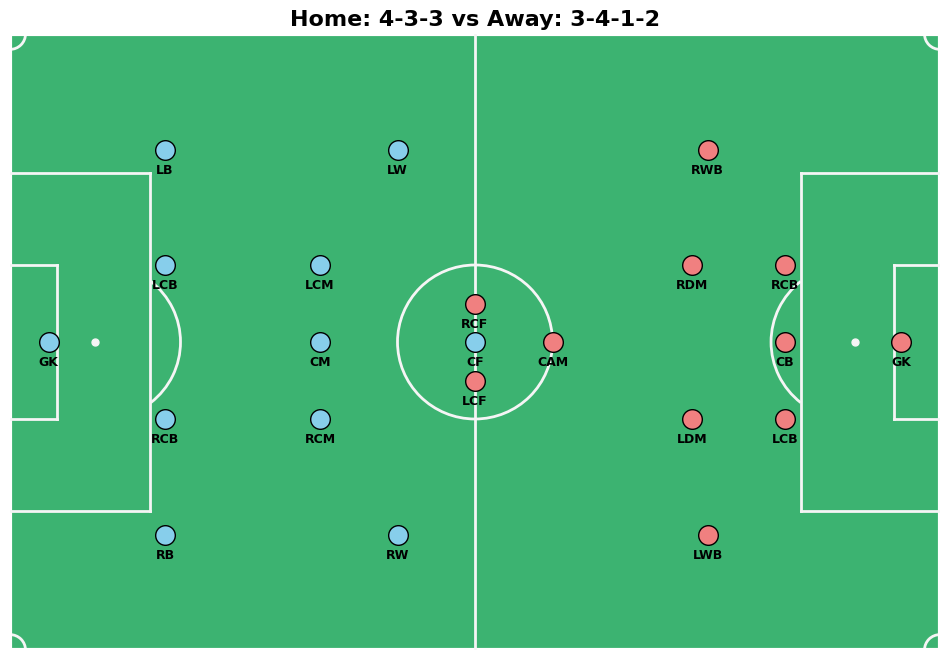

In [112]:
def mirror_position(x, y):
    """ Mirror player positions for the away team (right half) """
    return 120 - x, 80 - y

# Choose formations
home_formation = "433"
away_formation = "3412"

# Initialize the plot
fig, ax = plt.subplots(figsize=(12, 8))
draw_pitch(ax)

# Plot home team (left side)
for player in formations[home_formation]:
    x, y = player["x"], player["y"]
    abbr = player["abbr"]
    ax.scatter(x, y, s=200, color="skyblue", edgecolors='black', zorder=3)
    ax.text(x, y + 3.5, abbr, fontsize=9, ha="center", va="bottom", color="black", fontweight="bold")

# Plot away team (right side, mirrored)
for player in formations[away_formation]:
    x, y = mirror_position(player["x"], player["y"])
    abbr = player["abbr"]
    ax.scatter(x, y, s=200, color="lightcoral", edgecolors='black', zorder=3)
    ax.text(x, y + 3.5, abbr, fontsize=9, ha="center", va="bottom", color="black", fontweight="bold")

# Title
plt.title(f"Home: {format_formation(home_formation)} vs Away: {format_formation(away_formation)}", fontsize=16, fontweight="bold")
plt.show()

### Home vs Away (Kick Off Simulation)

In this simulation, the home team is assumed to take the kickoff. According to the rules, only one player is allowed inside the center circle at the start of the match, while all others must remain outside. The kickoff-taker is placed at the center spot, and teammates are slightly pulled back behind the halfway line to reflect this setup.

In [123]:
# Function to mirror player positions
def mirror_position(x, y):
    return 120 - x, 80 - y

# Function to check if a player is inside the center circle
def is_in_center_circle(x, y, center_x=60, center_y=40, radius=10):
    return np.sqrt((x - center_x)**2 + (y - center_y)**2) < radius

# Function to move a player outside the center circle
def move_outside_circle(x, y, center_x=60, center_y=40, radius=10.1):
    vec_x, vec_y = x - center_x, y - center_y
    norm = np.sqrt(vec_x**2 + vec_y**2)
    if norm == 0:
        return center_x, center_y - radius
    factor = radius / norm
    return center_x + vec_x * factor, center_y + vec_y * factor

# Function to adjust the kickoff lineup
def adjust_kickoff_lineup(lineup):
    adjusted = []
    central_forwards = ["LCF", "RCF", "CF", "SS"]
    cf_players = [p for p in lineup if p["abbr"] in central_forwards]

    used_roles = set()
    if len(cf_players) >= 2:
        # First on the center
        adjusted.append({"x": 60, "y": 40, "role": cf_players[0]["abbr"]})
        used_roles.add(cf_players[0]["abbr"])
        # Second just outside left of the circle
        adjusted.append({"x": 49, "y": 40, "role": cf_players[1]["abbr"]})
        used_roles.add(cf_players[1]["abbr"])

    for player in lineup:
        if player["abbr"] in used_roles:
            continue
        x = player["x"]
        if x >= 60:
            x = 59.5  # Ensure behind the ball
        adjusted.append({"x": x, "y": player["y"], "role": player["abbr"]})

    return adjusted

# Function to adjust the non-kickoff lineup
def adjust_non_kickoff_lineup(lineup):
    adjusted = []
    for p in lineup:
        x, y = mirror_position(p["x"], p["y"])
        if is_in_center_circle(x, y):
            x, y = move_outside_circle(x, y)
        adjusted.append({"x": x, "y": y, "role": p["abbr"]})
    return adjusted

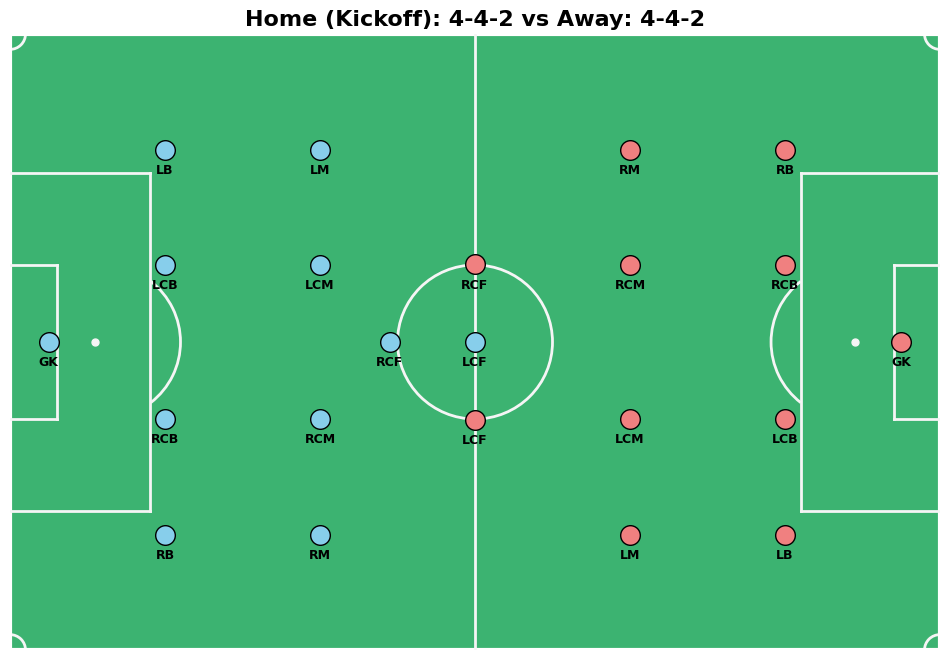

In [ ]:
# Set formations
home_formation = "442"
away_formation = "442"

# Adjust
home_lineup = adjust_kickoff_lineup(formations[home_formation])
away_lineup = adjust_non_kickoff_lineup(formations[away_formation])

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
draw_pitch(ax)

# Home players
for player in home_lineup:
    ax.scatter(player["x"], player["y"], s=200, color="skyblue", edgecolors='black', zorder=3)
    ax.text(player["x"], player["y"] + 3.5, player["role"], fontsize=9, ha="center", va="bottom", color="black", fontweight="bold")

# Away players
for player in away_lineup:
    ax.scatter(player["x"], player["y"], s=200, color="lightcoral", edgecolors='black', zorder=3)
    ax.text(player["x"], player["y"] + 3.5, player["role"], fontsize=9, ha="center", va="bottom", color="black", fontweight="bold")

plt.title(f"Home (Kickoff): {format_formation(home_formation)} vs Away: {format_formation(away_formation)}", fontsize=16, fontweight="bold")
plt.show()

### Match Visualization with Kick-Off Logic

This function displays both home and away teams with their chosen formations.  
It considers which team kicks off and adjusts the initial positions accordingly:  
- The kickoff team places one player in the center and another just outside the center circle  
- The non-kickoff team ensures no player stands within the center circle

**Note**: Some functions (with the same name) are changed respect the previous block !!!

In [130]:
# Function to mirror player positions
def mirror_position(x, y):
    return 120 - x, 80 - y

# Function to check if a player is inside the center circle
def is_in_center_circle(x, y, center_x=60, center_y=40, radius=10):
    return np.sqrt((x - center_x)**2 + (y - center_y)**2) < radius

# Function to move a player just outside the center circle
def move_outside_circle(x, y, center_x=60, center_y=40, radius=10.1):
    vec_x, vec_y = x - center_x, y - center_y
    norm = np.sqrt(vec_x**2 + vec_y**2)
    if norm == 0:
        return center_x, center_y - radius
    factor = radius / norm
    return center_x + vec_x * factor, center_y + vec_y * factor

# Function to adjust the lineup of the team doing the kickoff
def adjust_kickoff_lineup(lineup):
    adjusted = []
    central_forwards = ["LCF", "RCF", "CF", "SS"]
    cf_players = [p for p in lineup if p["abbr"] in central_forwards]

    used = set()
    if len(cf_players) >= 2:
        adjusted.append({
            "x": 60, "y": 40, 
            "abbr": cf_players[0]["abbr"], 
            "role": cf_players[0]["role"]
        })
        adjusted.append({
            "x": 50, "y": 40,
            "abbr": cf_players[1]["abbr"],
            "role": cf_players[1]["role"]
        })
        used.update([cf_players[0]["abbr"], cf_players[1]["abbr"]])

    for player in lineup:
        if player["abbr"] in used:
            continue
        x = player["x"]
        if x >= 60:
            x = 59.5  # make sure they are behind the kickoff point
        adjusted.append({
            "x": x, "y": player["y"],
            "abbr": player["abbr"],
            "role": player["role"]
        })

    return adjusted

# Function to adjust the lineup of the team NOT doing the kickoff
def adjust_non_kickoff_lineup(lineup):
    adjusted = []
    for player in lineup:
        x, y = player["x"], player["y"]
        if is_in_center_circle(x, y):
            x, y = move_outside_circle(x, y)
        adjusted.append({
            "x": x, "y": y,
            "abbr": player["abbr"],
            "role": player["role"]
        })
    return adjusted

In [131]:
def plot_match_lineups(home_formation, away_formation, kickoff_team="home"):
    
    # Set the lineups 
    home_raw = formations[home_formation]
    away_raw = formations[away_formation]

    # Set the colors
    left_color = "skyblue"
    right_color = "lightcoral"

    # Adjust based on kickoff team
    if kickoff_team == "home":
        left_lineup = adjust_kickoff_lineup(home_raw)
        right_lineup = adjust_non_kickoff_lineup(away_raw)
    else:
        left_lineup = adjust_non_kickoff_lineup(home_raw)
        right_lineup = adjust_kickoff_lineup(away_raw)

    # Draw the pitch
    fig, ax = plt.subplots(figsize=(12, 8))
    draw_pitch(ax)

    # Plot left team
    for player in left_lineup:
        x, y = player["x"], player["y"]
        ax.scatter(x, y, s=200, color=left_color, edgecolors='black', zorder=3)
        ax.text(x, y + 3.5, player["abbr"], fontsize=9, ha="center", va="bottom", color="black", fontweight="bold" )

    # Plot right team (mirrored)
    for player in right_lineup:
        x, y = mirror_position(player["x"], player["y"])
        ax.scatter(x, y, s=200, color=right_color, edgecolors='black', zorder=3)
        ax.text(x, y + 3.5, player["abbr"], fontsize=9, ha="center", va="bottom", color="black", fontweight="bold" )

    plt.title(f"Home ({format_formation(home_formation)}) vs Away ({format_formation(away_formation)}) | Kickoff: {kickoff_team.capitalize()}",
              fontsize=16, fontweight="bold" )
    plt.show()

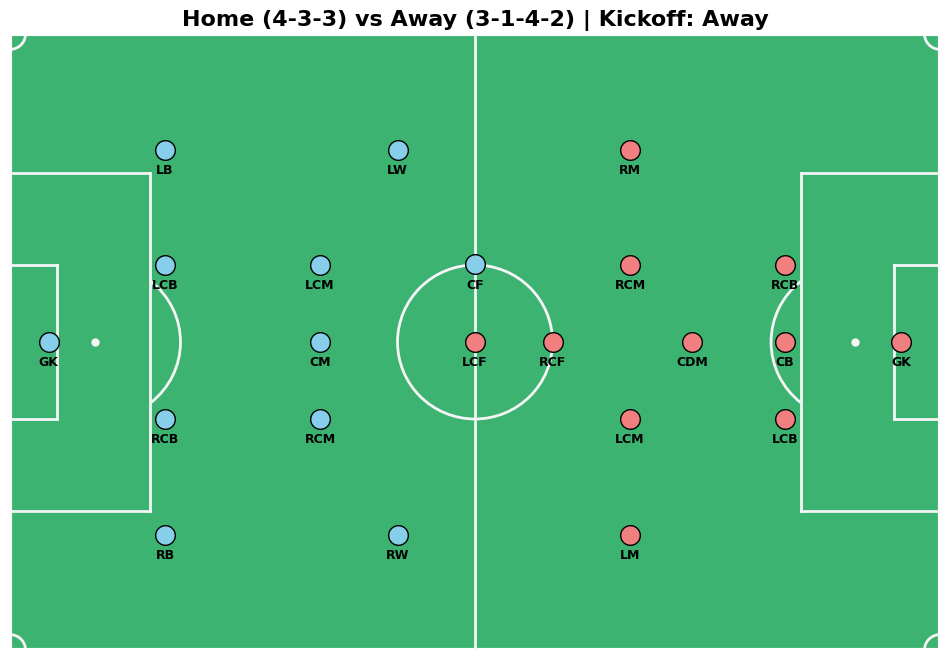

In [132]:
plot_match_lineups("433", "3142", kickoff_team="away")